In [62]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F

In [3]:
df_train = pd.read_csv('/train_data.csv')

In [9]:
df_test = pd.read_csv('/test_data.csv')

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

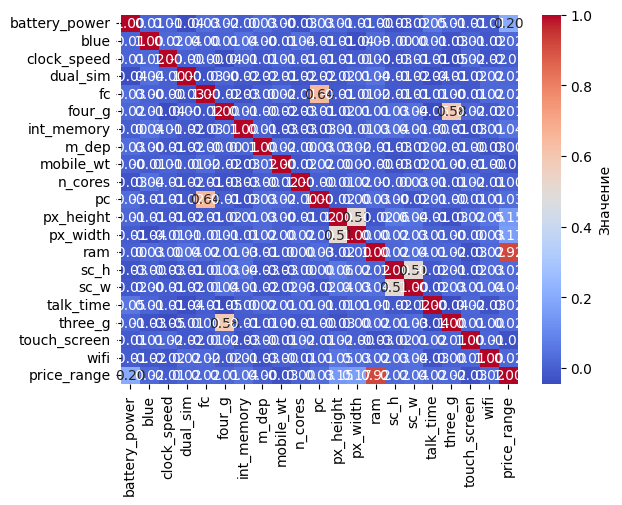

In [7]:
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

In [8]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
y_train = df_train['price_range'].values
X_train = df_train.drop(columns=['price_range']).values

In [20]:
X_test = df_test.drop(columns=['id']).values

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

In [53]:
class MobileDataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  # y может быть None

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# Создаём Dataset
train_dataset = MobileDataset(X_train_tensor, y_train_tensor)
test_dataset = MobileDataset(X_test_tensor)

In [54]:
# Параметры DataLoader
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [74]:
# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size=X_train_tensor.shape[1],
                 hidden_size=64, num_classes=4):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)

        return out


In [75]:
model = NeuralNet()

In [46]:
# Параметры обучения
num_epochs = 100
learning_rate = 0.01

In [57]:
# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [64]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [70]:
print(y_batch.unique())

tensor([0, 1, 2, 3])


In [77]:
# Обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
  for batch_idx, (X_batch, y_batch) in enumerate(train_loader):
    # Прямой проход


    outputs = model(X_batch)
    loss = criterion(outputs, y_batch)

    # Обратное распространение
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/100], Loss: 1.3988
Epoch [1/100], Loss: 1.3627
Epoch [1/100], Loss: 1.3821
Epoch [1/100], Loss: 1.4171
Epoch [1/100], Loss: 1.3785
Epoch [1/100], Loss: 1.4057
Epoch [1/100], Loss: 1.4177
Epoch [1/100], Loss: 1.4007
Epoch [1/100], Loss: 1.4439
Epoch [1/100], Loss: 1.3630
Epoch [1/100], Loss: 1.3925
Epoch [1/100], Loss: 1.3430
Epoch [1/100], Loss: 1.4193
Epoch [1/100], Loss: 1.4172
Epoch [1/100], Loss: 1.3734
Epoch [1/100], Loss: 1.4193
Epoch [1/100], Loss: 1.3860
Epoch [1/100], Loss: 1.4056
Epoch [1/100], Loss: 1.3799
Epoch [1/100], Loss: 1.3783
Epoch [1/100], Loss: 1.4038
Epoch [1/100], Loss: 1.3777
Epoch [1/100], Loss: 1.3953
Epoch [1/100], Loss: 1.4118
Epoch [1/100], Loss: 1.4202
Epoch [1/100], Loss: 1.3882
Epoch [1/100], Loss: 1.3989
Epoch [1/100], Loss: 1.4098
Epoch [1/100], Loss: 1.3814
Epoch [1/100], Loss: 1.3982
Epoch [1/100], Loss: 1.4025
Epoch [1/100], Loss: 1.3671
Epoch [2/100], Loss: 1.4072
Epoch [2/100], Loss: 1.3998
Epoch [2/100], Loss: 1.4144
Epoch [2/100], Loss:

In [78]:
model.eval()
predictions = []
with torch.no_grad():
    for X_batch in test_loader:
        y_pred = model(X_batch)
        predictions.extend(torch.argmax(y_pred, dim=1).numpy())  # Берём предсказанные классы


df_test["price_range_pred"] = predictions
df_test.to_csv("predicted_test.csv", index=False)

In [80]:
df_test['price_range_pred']

,price_range_pred
0,2
1,2
2,3
3,2
4,2
...,...
995,2
996,3
997,2
998,2


<ipython-input-81-a6ce1a60c9c2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_test["price_range_pred"], palette="viridis")


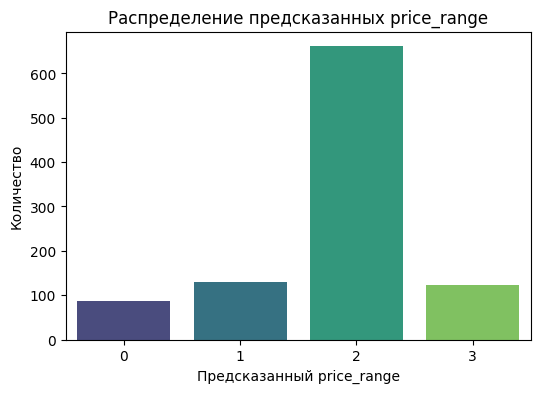

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_test["price_range_pred"], palette="viridis")
plt.xlabel("Предсказанный price_range")
plt.ylabel("Количество")
plt.title("Распределение предсказанных price_range")
plt.show()

<ipython-input-82-be2b8ddf90c5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train["price_range"], palette="viridis")


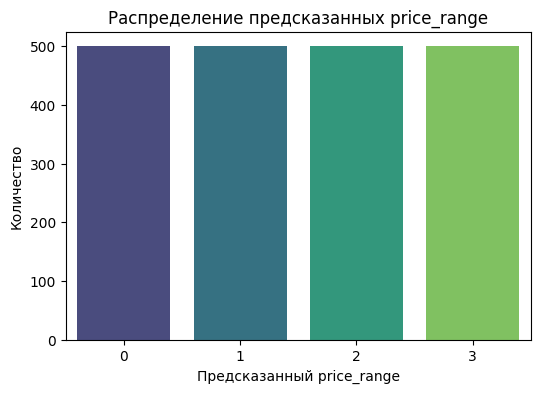

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_train["price_range"], palette="viridis")
plt.xlabel("Предсказанный price_range")
plt.ylabel("Количество")
plt.title("Распределение предсказанных price_range")
plt.show()

In [86]:
import shap